In [64]:
import numpy as np
import pandas as pd
import random
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from IPython.display import display, Image
#from graphviz import Digraph


In [31]:
def synth_data():
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    times = ['Morning', 'Afternoon', 'Evening', 'Night']
    data = {
        'Road Condition': [],
        'Weather Condition': [],
        'Day of the Week': [],
        'Time of Day': [],
        'Number of Lanes': [],
        'Travel Time': []
    }

    for _ in range(100):
        day = random.choice(days)
        time = random.choice(times)
        weather = random.choice([0,1])
        lanes = random.randint(1,5)
        road_condition = random.randint(1,3)

        travel_time = 30

        # Adjust for weekend
        if day in ['Friday', 'Saturday']:
            travel_time -= 5

        # Adjust for weather
        if weather == 1:
            travel_time += 10

        # Adjust for time of day
        if time in ['Morning', 'Afternoon']:
            travel_time += 15

        # Adjust for number of lanes
        travel_time += lanes * 5

        # Add some randomness
        travel_time += random.randint(-5, 5)

        data['Road Condition'].append(road_condition)
        data['Weather Condition'].append(weather)
        data['Day of the Week'].append(day)
        data['Time of Day'].append(time)
        data['Number of Lanes'].append(lanes)
        data['Travel Time'].append(travel_time)

    return pd.DataFrame(data)


In [32]:
output_file = "./Data/travel_time_data.csv"
if not os.path.isfile(output_file):
    # Generate the synthetic data
    df = synth_data()    
    df.to_csv("./travel_time_data.csv", index=False)
else:
    df = pd.read_csv(output_file)

df.head()

,Road Condition,Weather Condition,Day of the Week,Time of Day,Number of Lanes,Travel Time
0,2,1,Thursday,Morning,3,70
1,1,1,Monday,Morning,1,63
2,1,1,Wednesday,Afternoon,3,68
3,2,0,Sunday,Evening,3,43
4,1,1,Saturday,Afternoon,5,77


In [33]:
def calculate_travel_time(day,time,weather,lanes):
    travel_time = 30

    if day in ['Friday','Saturday']:
        travel_time -= 5
    if weather == 1:
        travel_time += 10
    if time in ['Morning','Afternoon']:
        travel_time += 15
    travel_time += lanes * 5

    return travel_time

In [34]:
df['Predicted Travel Time'] = df.apply(
    lambda row: calculate_travel_time(
        row['Day of the Week'],
        row['Time of Day'],
        row['Weather Condition'],
        row['Number of Lanes']
    ), axis=1
)

df[['Travel Time','Predicted Travel Time']].head()

,Travel Time,Predicted Travel Time
0,70,70
1,63,60
2,68,70
3,43,45
4,77,75


In [35]:
MSE = mean_squared_error(df['Travel Time'],df['Predicted Travel Time'])
print(MSE)

10.78


In [36]:
X = df[['Number of Lanes']]
y = df['Travel Time']

model = LinearRegression()
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
model.coef_,model.intercept_

(array([5.67064855]), np.float64(40.58817380916828))

In [39]:
model.predict(np.array([[7]]))

d:\CA-Makeen\week9\learning_regression\my_virtual_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([80.28271365])

In [40]:
df.loc[:,"Predicted Travel Time (OLS)"] = model.predict(df["Number of Lanes"].values.reshape(-1,1))

d:\CA-Makeen\week9\learning_regression\my_virtual_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [42]:
df

,Road Condition,Weather Condition,Day of the Week,Time of Day,Number of Lanes,Travel Time,Predicted Travel Time,Predicted Travel Time (OLS)
0,2,1,Thursday,Morning,3,70,70,57.600119
1,1,1,Monday,Morning,1,63,60,46.258822
2,1,1,Wednesday,Afternoon,3,68,70,57.600119
3,2,0,Sunday,Evening,3,43,45,57.600119
4,1,1,Saturday,Afternoon,5,77,75,68.941417
...,...,...,...,...,...,...,...,...
95,1,1,Friday,Morning,3,65,65,57.600119
96,3,0,Sunday,Morning,4,63,65,63.270768
97,3,0,Thursday,Evening,2,40,40,51.929471
98,2,1,Wednesday,Afternoon,4,79,75,63.270768


In [44]:
MSE = mean_squared_error(df['Travel Time'], df['Predicted Travel Time (OLS)'])
print(MSE)

99.31996814494052


In [46]:
df['Time of Day Encoded'] = df['Time of Day'].map({

    'Morning':0, 'Afternoon':1,'Evening':2,'Night':3
})

X = df[['Number of Lanes','Time of Day Encoded']]
y = df['Travel Time']

In [48]:
multi_model = LinearRegression()
multi_model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
multi_model.coef_,multi_model.intercept_

(array([ 5.57978621, -6.96761547]), np.float64(51.030753536429074))

In [52]:
df.loc[:,"Predicted Travel Time (OLS) - Multiple LR"] = multi_model.predict(df[["Number of Lanes","Time of Day Encoded"]].values.reshape(-1,2))

d:\CA-Makeen\week9\learning_regression\my_virtual_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [55]:
df

,Road Condition,Weather Condition,Day of the Week,Time of Day,Number of Lanes,Travel Time,Predicted Travel Time,Predicted Travel Time (OLS),Time of Day Encoded,Predicted Travel Time (OLS) - Multiple LR
0,2,1,Thursday,Morning,3,70,70,57.600119,0,67.770112
1,1,1,Monday,Morning,1,63,60,46.258822,0,56.610540
2,1,1,Wednesday,Afternoon,3,68,70,57.600119,1,60.802497
3,2,0,Sunday,Evening,3,43,45,57.600119,2,53.834881
4,1,1,Saturday,Afternoon,5,77,75,68.941417,1,71.962069
...,...,...,...,...,...,...,...,...,...,...
95,1,1,Friday,Morning,3,65,65,57.600119,0,67.770112
96,3,0,Sunday,Morning,4,63,65,63.270768,0,73.349898
97,3,0,Thursday,Evening,2,40,40,51.929471,2,48.255095
98,2,1,Wednesday,Afternoon,4,79,75,63.270768,1,66.382283


In [59]:
MSE = mean_squared_error(df['Travel Time'],df['Predicted Travel Time (OLS) - Multiple LR'])
print(MSE)

43.58441639165443


C:\Users\hal3r\AppData\Local\Temp\ipykernel_5392\1367110267.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


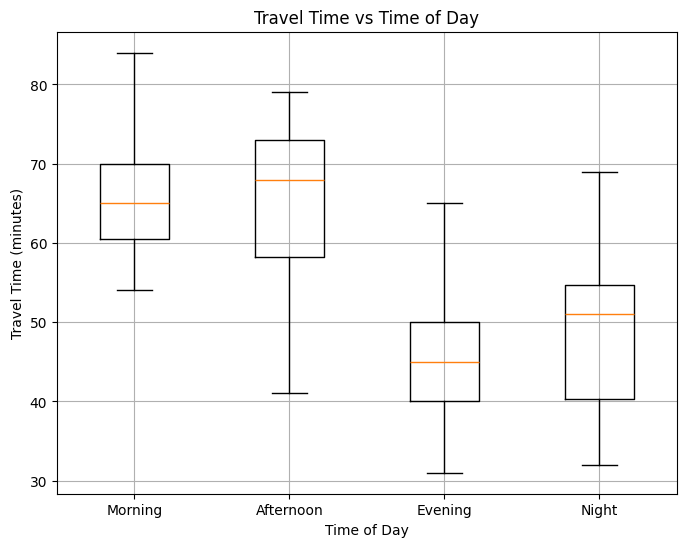

In [66]:
plt.figure(figsize=(8, 6))
plt.boxplot(
    [df[df['Time of Day'] == time]['Travel Time'] for time in df['Time of Day'].unique()],
    labels=df['Time of Day'].unique()
)
plt.title('Travel Time vs Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Travel Time (minutes)')
plt.grid(True)
plt.show()

In [ ]:
#import plotly.io as pio
#import plotly.graph_objects as go

df_tmp = df.copy()

# Create 3D scatter plot for actual data
scatter = go.Scatter3d(
    x=df_tmp['Number of Lanes'],
    y=df_tmp['Time of Day Encoded'],
    z=df_tmp['Travel Time'],
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Actual Travel Time'
)

# Create 3D surface plot for predicted data (hyperplane)
x_range = np.linspace(df_tmp['Number of Lanes'].min(), df_tmp['Number of Lanes'].max(), 10)
y_range = np.linspace(df_tmp['Time of Day Encoded'].min(), df_tmp['Time of Day Encoded'].max(), 10)
x_grid, y_grid = np.meshgrid(x_range, y_range)
z_grid = multi_model.intercept_ +   (multi_model.coef_[0] * x_grid) + \
                                    (multi_model.coef_[1] * y_grid)

surface = go.Surface(
    x=x_grid,
    y=y_grid,
    z=z_grid,
    colorscale='Viridis',
    opacity=0.7,
    name='ML Model'
)

# Combine plots
fig = go.Figure(data=[scatter, surface])

# Set plot layout
fig.update_layout(
    scene=dict(
        xaxis_title='Number of Lanes',
        yaxis_title='Time of Day Encoded',
        zaxis_title='Travel Time'
    ),
    title='3D: Travel Time, Time of Day, and Predictions',
    height=800
)

fig.show()


ModuleNotFoundError: No module named 'plotly'